# Instructions:
This is an exercise aimed at assessing the contestant's proficiency in the following areas:
1. Data Transformation - Cleaning.
2. Data Understanding and Segmentation.
3. Utilization of data for business profitability.
4. Analysis, recommendations, and contestant's rigor in generating business value.
5. Communication and presentation skills in delivering results.
6. The entire exercise is conducted in English (Important).

# Bonus:
The participant is encouraged to incorporate the implementation of at least one of the following topics into their solution, aiming to prioritize their candidacy in the selection process. It is recommended to include at least one of the following:
1. Unsupervised Learning Algorithms (Clustering, PCA, etc).
2. Natural Language Processing (NLP) Algorithms.
3. Web Scraping (Extraction of relevant information from the web).
4. Creation of business strategies and proposals based on the presented problem (Soft Skills).

* Any other data science topic that the contestant deems relevant to the presented problem can be chosen.
* Multiple topics from the ones mentioned above can be selected.
* The chosen topic should be briefly explained.

# Use case :  

You are a consultant for a company that is looking to invest in the US Real Estate market.

For this task you're given two timeseries:
- A list of columns with several variables in the US Economy, mostly indexes and rates. (Since there are market indexes, some columns contain open and close prices, for current indexes and rates, you should use "last price")
- A list of columns with the SyP Case Shiller Index, which is a measurement of the US housing market prices over time.
- There's an auxiliar table with relevant information about each time series, were you can find the description of each variable, alongside its frequency, units quoted and so on.

The expected outcome is an study of the US Real Estate market, suggesting markets, times and strategies for the company to invest in. So the following path is being proposed:  

1. Data Cleaning and Transformation:
    - The data is nowhere near to be clean and ready to be used. You should use your skills to clean, resample, merge, differentiate or apply any other necessary transformation to the data. Feel free to use whatever method you think is best to achieve this goal.
2. Data Understanding and Segmentation:
    - Make and EDA (Exploratory data analysis) of the data, considering facts that happened in the US Real Estate Market and your conclusions over these facts.
    - Plot and explaing results
    - Select the most promising real estate markets to work with. (In which markets we should be focused)
    - Select the columns that are relevant to explain the SyP Case Shiller Index return for the chosen market and explain why you chose them. (Use any statistis test if neccesary)
    
3. Utilization of data for business profitability:
    - Create a predictive model to forecast the SyP Case Shiller Index (in the selected location) for the next 2 years (or more)
    - Test the model outputs, assumptions and make the necessary adjustments to make it more accurate.
    - Run tests to check model's accuracy (The test complexity will be assessed too), using stastistical or financial methods which can make sense to solve the problem.  
    - Run the model with the data you have and make a strategy to invest in the US Real Estate Market. (Use whatever tool you think is best to achieve this goal).
    - Plot and explain every result you have.
4. Analysis, recommendations, and contestant's rigor in generating business value:
    - Show your conclusions and recommendations to the company, explaining reasons for your choices and the expected results.
    - Make a business proposal to the company, explaining the strategy you would use to invest in the US Real Estate Market.
5. Communication and presentation skills in delivering results:
    - Present your conclusions for this exercise in a clear and concise way, using the best practices for data visualization and storytelling.

## 0. Install libraries

In [2]:
#pip install pandas numpy scipy plotly sklearn statsmodels
import pandas as pd
import numpy as np
import scipy as sp
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import sklearn as sklearn
import statsmodels.api as sm
from sklearn.linear_model import *
import statsmodels.tsa.api as ts
## you can barely complete the test using the following ones, however you can install others if you want (For Bonus Points)

# 1. Data Cleaning and Transformation

In [3]:
from google.colab import files
files.upload()
excel_file ='data.xlsx'
data = pd.read_excel(excel_file)


Saving data.xlsx to data.xlsx


In [4]:
# Eliminate first 5 rows
data = pd.read_excel("data.xlsx", sheet_name="Economic Data",skiprows=range(5))


In [5]:
## load data - Drop First 2 columns and open price for each index and remain only close prices




skip_cols = [0,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]
#define columns to keep
keep_cols = [i for i in range(41) if i not in skip_cols]

data = pd.read_excel("data.xlsx", sheet_name="Economic Data",skiprows=range(5),usecols=keep_cols)
data.columns = ['Date', 'SPX Index CP',	'NDX Index CP',	'CPI INDX Index CP',	'EHUPUS Index CP',	'CPFTDIV Index CP',	'CPWG67NS Index CP',	'FDIDFDB Index CP',	'FDIDFDMO Index CP',	'HIREPRNR Index CP',	'HIREGONR Index CP',	'SFFRNEWS Index CP',	'USHBTRAF Index CP',	'FDIITOTL Index CP',	'VISTTRUS Index CP',	'VELOM2 Index CP',	'ACMTRY10 Index CP',	'MBACTTL Index CP',		'NMCMFR15 Index CP',		'NMCMFR30 Index CP']
display(data)

Date  SPX Index CP  NDX Index CP  CPI INDX Index CP  \
0    1990-06-29        359.54        238.42                NaN   
1    1990-07-02        360.16        238.19                NaN   
2    1990-07-03           NaN           NaN                NaN   
3    1990-07-04        355.68        237.30                NaN   
4    1990-07-05        358.42        238.47                NaN   
...         ...           ...           ...                ...   
8759 2024-01-25       4890.97      17421.01                NaN   
8760 2024-01-26       4927.93      17596.27                NaN   
8761 2024-01-29       4924.97      17476.71                NaN   
8762 2024-01-30       4892.79      17243.21                NaN   
8763 2024-01-31           NaN           NaN                NaN   

      EHUPUS Index CP  CPFTDIV Index CP  CPWG67NS Index CP  FDIDFDB Index CP  \
0                 NaN               NaN                NaN               NaN   
1                 NaN               NaN                NaN               NaN   
2                 NaN               NaN                NaN               NaN   
3                 NaN               NaN                NaN               NaN   
4                 NaN               NaN                NaN               NaN   
...               ...               ...                ...               ...   
8759              NaN               NaN                NaN               NaN   
8760              NaN               NaN                NaN               NaN   
8761              NaN               NaN                NaN               NaN   
8762              NaN               NaN                NaN               NaN   
8763              NaN               NaN                NaN               NaN   

      FDIDFDMO Index CP  HIREPRNR Index CP  HIREGONR Index CP  \
0                   NaN                NaN                NaN   
1                   NaN                NaN                NaN   
2                   NaN                NaN                NaN   
3                   NaN                NaN                NaN   
4                   NaN                NaN                NaN   
...                 ...                ...                ...   
8759                NaN                NaN                NaN   
8760                NaN                NaN                NaN   
8761                NaN                NaN                NaN   
8762                NaN                NaN                NaN   
8763                NaN                NaN                NaN   

      SFFRNEWS Index CP  USHBTRAF Index CP  FDIITOTL Index CP  \
0              0.125479                NaN                NaN   
1              0.111619                NaN                NaN   
2              0.080141                NaN                NaN   
3              0.100956                NaN                NaN   
4              0.113384                NaN                NaN   
...                 ...                ...                ...   
8759           0.083693                NaN                NaN   
8760                NaN                NaN                NaN   
8761                NaN                NaN                NaN   
8762                NaN                NaN                NaN   
8763                NaN               29.0                NaN   

      VISTTRUS Index CP  VELOM2 Index CP  ACMTRY10 Index CP  MBACTTL Index CP  \
0                   NaN              NaN             6.2300               NaN   
1                   NaN              NaN             6.1638               NaN   
2                   NaN              NaN                NaN               NaN   
3                   NaN              NaN             6.2073               NaN   
4                   NaN              NaN             6.2642               NaN   
...                 ...              ...                ...               ...   
8759                NaN              NaN             4.2088               NaN   
8760                NaN              NaN       

Cleaning data on daily periodicity variables

In [ ]:
Daily_data = data[['Date','SPX Index CP','NDX Index CP','SFFRNEWS Index CP','ACMTRY10 Index CP']].copy()
display(Daily_data)

In [ ]:
Daily_data.isnull().any()

In [ ]:
Daily_data = Daily_data.dropna()
print(Daily_data)

In [8]:
## Convert Date variable in Date format

data['Date'] = pd.to_datetime(data['Date']).dt.date

Cleaning data on Monthly periodicity variables

In [ ]:
Montly_data = data[['Date','CPI INDX Index CP','CPWG67NS Index CP','USHBTRAF Index CP']].copy()
display(Montly_data)

In [15]:
Montly_data = Montly_data.dropna()
print(Montly_data)

            Date  CPI INDX Index CP  CPWG67NS Index CP  USHBTRAF Index CP
22    1990-07-31            130.500            383.400               26.0
45    1990-08-31            131.600            386.900               21.0
88    1990-10-31            133.400            393.000               21.0
110   1990-11-30            133.700            393.800               18.0
131   1990-12-31            134.200            393.800               16.0
...          ...                ...                ...                ...
8610  2023-06-30            303.841            891.803               37.0
8631  2023-07-31            304.348            893.309               40.0
8654  2023-08-31            306.269            898.229               35.0
8697  2023-10-31            307.619            899.779               26.0
8719  2023-11-30            307.917            897.253               21.0

[288 rows x 4 columns]


In [16]:
Montly_data.dtypes


Date                  object
CPI INDX Index CP    float64
CPWG67NS Index CP    float64
USHBTRAF Index CP    float64
dtype: object

In [17]:
Montly_data['Date'] = Montly_data['Date'].astype('string')

<ipython-input-17-3b724a596a67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Montly_data['Date'] = Montly_data['Date'].astype('string')


In [ ]:
Montly_data['Year']= Montly_data['Date'].str.split(pat ='-').str[0]
Montly_data['Month']= Montly_data['Date'].str.split(pat ='-').str[1]

In [19]:
Montly_data

Date  CPI INDX Index CP  CPWG67NS Index CP  USHBTRAF Index CP  \
22    1990-07-31            130.500            383.400               26.0   
45    1990-08-31            131.600            386.900               21.0   
88    1990-10-31            133.400            393.000               21.0   
110   1990-11-30            133.700            393.800               18.0   
131   1990-12-31            134.200            393.800               16.0   
...          ...                ...                ...                ...   
8610  2023-06-30            303.841            891.803               37.0   
8631  2023-07-31            304.348            893.309               40.0   
8654  2023-08-31            306.269            898.229               35.0   
8697  2023-10-31            307.619            899.779               26.0   
8719  2023-11-30            307.917            897.253               21.0   

      Year Month  
22    1990    07  
45    1990    08  
88    1990    10  
110   1990    11  
131   1990    12  
...    ...   ...  
8610  2023    06  
8631  2023    07  
8654  2023    08  
8697  2023    10  
8719  2023    11  

[288 rows x 6 columns]

Cleaning data on Case Shiller Index

In [ ]:
## load data - Drop First 2 columns and open price for each index and remain only close prices

skip_cols = [0,4,5]
#define columns to keep
keep_cols = [i for i in range(23) if i not in skip_cols]

Housing_data = pd.read_excel("data.xlsx", sheet_name="Case Shiller Index", skiprows=range(6),usecols=keep_cols)
Housing_data.columns = ['Date','SPCSATL CP','SPCSBOS CP','SPCSCHAR CP','SPCSCHI CP','SPCSCLE CP','SPCSDAL CP','SPCSDEN CP','SPCSDET CP',	'SPCSLA CP','SPCSLV CP','SPCSMIA CP','SPCSNY CP','SPCSPHX CP','SPCSPORS CP','SPCSSD CP','SPCSSEA CP','SPCSSF CP','SPCSTMP CP','SPCSWDC CP']
display(Housing_data)

In [ ]:
Housing_data = Housing_data.dropna()
print(Housing_data)

In [ ]:
Housing_data.isnull().any()


In [ ]:
Housing_data.dtypes

In [ ]:
## Convert Date variable in Date format

Housing_data['Date'] = pd.to_datetime(Housing_data['Date']).dt.date

In [ ]:
Housing_data['Date'] = Housing_data['Date'].astype('string')

In [ ]:
Housing_data['Year']= Housing_data['Date'].str.split(pat ='-').str[0]
Housing_data['Month']= Housing_data['Date'].str.split(pat ='-').str[1]


In [ ]:
print(Housing_data)

In [ ]:
# Merge data frames Monthly data and Housing prices
merged_data = pd.merge(Housing_data, Montly_data,on=['Year', 'Month'], how='inner')
merged_data

In [29]:
merged_data.drop(['Date_y'], axis=1)
merged_data.rename(columns = {'Date_x':'Date'}, inplace = True)

In [30]:
# Organize data frame columns
merged_data = merged_data[['Year','Month','Date','SPCSATL CP','SPCSBOS CP','SPCSCHAR CP','SPCSCHI CP','SPCSCLE CP','SPCSDAL CP','SPCSDEN CP','SPCSDET CP','SPCSLA CP','SPCSLV CP','SPCSMIA CP','SPCSNY CP','SPCSPHX CP','SPCSPORS CP','SPCSSD CP','SPCSSEA CP','SPCSSF CP','SPCSTMP CP','SPCSWDC CP','CPI INDX Index CP','CPWG67NS Index CP','USHBTRAF Index CP']]
merged_data

Year Month        Date  SPCSATL CP  SPCSBOS CP  SPCSCHAR CP  SPCSCHI CP  \
0    2000    01  2000-01-31      100.00      100.00       100.00      100.00   
1    2000    02  2000-02-29      100.80      100.36       100.43      100.52   
2    2000    03  2000-03-31      101.18      101.31       100.92      101.53   
3    2000    05  2000-05-31      103.38      105.85       102.68      104.38   
4    2000    06  2000-06-30      104.58      108.48       103.27      106.08   
..    ...   ...         ...         ...         ...          ...         ...   
202  2023    06  2023-06-30      237.65      318.64       264.34      195.53   
203  2023    07  2023-07-31      239.37      319.08       266.36      197.22   
204  2023    08  2023-08-31      241.18      320.98       268.37      197.35   
205  2023    10  2023-10-31      241.82      323.53       270.39      198.47   
206  2023    11  2023-11-30      241.91      322.73       271.05      197.67   

     SPCSCLE CP  SPCSDAL CP  SPCSDEN CP  ...  SPCSPHX CP  SPCSPORS CP  \
0        100.00      100.00      100.00  ...      100.00       100.59   
1         99.63      101.82      100.73  ...      100.43       101.25   
2        100.35      102.04      101.99  ...      101.42       101.56   
3        102.30      104.11      105.26  ...      102.98       102.08   
4        102.65      104.28      107.32  ...      103.89       102.19   
..          ...         ...         ...  ...         ...          ...   
202      181.48      295.24      317.46  ...      317.60       321.87   
203      182.95      296.13      318.01  ...      320.34       322.18   
204      182.66      295.61      317.79  ...      322.48       323.16   
205      183.64      294.28      314.86  ...      325.99       323.19   
206      184.16      292.41      311.96  ...      324.91       322.63   

     SPCSSD CP  SPCSSEA CP  SPCSSF CP  SPCSTMP CP  SPCSWDC CP  \
0       100.00      100.00     100.00      100.00      100.00   
1       101.07      100.48     102.70      100.51      100.53   
2       103.26      102.24     106.56      100.75      101.70   
3       107.15      104.78     115.01      103.26      104.91   
4       109.64      105.28     118.45      104.35      106.29   
..         ...         ...        ...         ...         ...   
202     413.63      370.42     350.88      376.68      312.34   
203     416.73      372.17     351.38      379.40      314.15   
204     419.06      372.82     349.71      380.84      313.89   
205     418.58      368.88     348.00      382.82      313.32   
206     416.36      363.85     343.59      383.22      312.50   

     CPI INDX Index CP  CPWG67NS Index CP  USHBTRAF Index CP  
0              169.300            493.200               47.0  
1              170.000            495.900               46.0  
2              171.000            500.000               46.0  
3              171.200            501.100               45.0  
4              172.200            504.100               43.0  
..                 ...                ...                ...  
202            303.841            891.803               37.0  
203            304.348            893.309               40.0  
204            306.269            898.229               35.0  
205            307.619            899.779               26.0  
206            307.917            897.253               21.0  

[207 rows x 25 columns]

In [ ]:
merged_data['Date'] = merged_data['Date'].astype("object")

In [ ]:
merged_data.dtypes

# 2. Data Understanding and Segmentation (EDA)

### 2.1. Data Understanding

In [ ]:
## Convert current variable dataframe in terms of monthly return change
merged_data['SPCSATL GR'] = merged_data['SPCSATL CP'].pct_change()
merged_data['SPCSBOS GR'] = merged_data['SPCSBOS CP'].pct_change()
merged_data['SPCSCHAR GR'] = merged_data['SPCSCHAR CP'].pct_change()
merged_data['SPCSCHI GR'] = merged_data['SPCSCHI CP'].pct_change()
merged_data['SPCSCLE GR'] = merged_data['SPCSCLE CP'].pct_change()
merged_data['SPCSDAL GR'] = merged_data['SPCSDAL CP'].pct_change()
merged_data['SPCSDEN GR'] = merged_data['SPCSDEN CP'].pct_change()
merged_data['SPCSDET GR'] = merged_data['SPCSDET CP'].pct_change()
merged_data['SPCSLA GR'] = merged_data['SPCSLA CP'].pct_change()
merged_data['SPCSLV GR'] = merged_data['SPCSLV CP'].pct_change()
merged_data['SPCSMIA GR'] = merged_data['SPCSMIA CP'].pct_change()
merged_data['SPCSNY GR'] = merged_data['SPCSNY CP'].pct_change()
merged_data['SPCSPHX GR'] = merged_data['SPCSPHX CP'].pct_change()
merged_data['SPCSPORS GR'] = merged_data['SPCSPORS CP'].pct_change()
merged_data['SPCSSD GR'] = merged_data['SPCSSD CP'].pct_change()
merged_data['SPCSSEA GR'] = merged_data['SPCSSEA CP'].pct_change()
merged_data['SPCSSF GR'] = merged_data['SPCSSF CP'].pct_change()
merged_data['SPCSTMP GR'] = merged_data['SPCSTMP CP'].pct_change()
merged_data['SPCSWDC GR'] = merged_data['SPCSWDC CP'].pct_change()
merged_data['CPI Index GR'] = merged_data['CPI INDX Index CP'].pct_change()
merged_data['CPWG67NS Index GR'] = merged_data['CPWG67NS Index CP'].pct_change()
merged_data['USHBTRAF Index GR'] = merged_data['USHBTRAF Index CP'].pct_change()

merged_data.head(10)


In [ ]:
#Data with only montly returns
merged_data = merged_data.drop(['SPCSATL CP','SPCSBOS CP','SPCSCHAR CP','SPCSCHI CP','SPCSCLE CP','SPCSDAL CP','SPCSDEN CP','SPCSDET CP','SPCSLA CP','SPCSLV CP','SPCSMIA CP','SPCSNY CP','SPCSPHX CP','SPCSPORS CP','SPCSSD CP','SPCSSEA CP','SPCSSF CP','SPCSTMP CP','SPCSWDC CP','CPI INDX Index CP','CPWG67NS Index CP','USHBTRAF Index CP'], axis=1)
merged_data

In [ ]:
#Remove first observation
consolidated_data = merged_data.drop(merged_data.index[0])
consolidated_data

In [ ]:
#Descripte statistics
descrip_est = consolidated_data.describe()
print(descrip_est)


In [38]:
#Average return and standard deviationfor price index in USA cities previous 2012

consolidated_data['Year'] = consolidated_data['Year'].astype(float)

R_00_11_ATL = consolidated_data[consolidated_data['Year'] < 2012]['SPCSATL GR'].mean
SD_00_11_ATL = consolidated_data[consolidated_data['Year'] < 2012]['SPCSATL GR'].std

R_00_11_BOS = consolidated_data[consolidated_data['Year'] < 2012]['SPCSBOS GR'].mean
SD_00_11_BOS = consolidated_data[consolidated_data['Year'] < 2012]['SPCSBOS GR'].std

R_00_11_CHAR = consolidated_data[consolidated_data['Year'] < 2012]['SPCSCHAR GR'].mean
SD_00_11_CHAR = consolidated_data[consolidated_data['Year'] < 2012]['SPCSCHAR GR'].std

R_00_11_CHI = consolidated_data[consolidated_data['Year'] < 2012]['SPCSCHI GR'].mean
SD_00_11_CHI = consolidated_data[consolidated_data['Year'] < 2012]['SPCSCHI GR'].std

R_00_11_CLE = consolidated_data[consolidated_data['Year'] < 2012]['SPCSCLE GR'].mean
SD_00_11_CLE = consolidated_data[consolidated_data['Year'] < 2012]['SPCSCLE GR'].std

R_00_11_DAL = consolidated_data[consolidated_data['Year'] < 2012]['SPCSDAL GR'].mean
SD_00_11_DAL = consolidated_data[consolidated_data['Year'] < 2012]['SPCSDAL GR'].std

R_00_11_DEN = consolidated_data[consolidated_data['Year'] < 2012]['SPCSDEN GR'].mean
SD_00_11_DEN = consolidated_data[consolidated_data['Year'] < 2012]['SPCSDEN GR'].std

R_00_11_DET = consolidated_data[consolidated_data['Year'] < 2012]['SPCSDET GR'].mean
SD_00_11_DET = consolidated_data[consolidated_data['Year'] < 2012]['SPCSDET GR'].std

R_00_11_LA = consolidated_data[consolidated_data['Year'] < 2012]['SPCSLA GR'].mean
SD_00_11_LA = consolidated_data[consolidated_data['Year'] < 2012]['SPCSLA GR'].std

R_00_11_LV = consolidated_data[consolidated_data['Year'] < 2012]['SPCSLV GR'].mean
SD_00_11_LV = consolidated_data[consolidated_data['Year'] < 2012]['SPCSLV GR'].std

R_00_11_MIA = consolidated_data[consolidated_data['Year'] < 2012]['SPCSMIA GR'].mean
SD_00_11_MIA = consolidated_data[consolidated_data['Year'] < 2012]['SPCSMIA GR'].std

R_00_11_NY = consolidated_data[consolidated_data['Year'] < 2012]['SPCSNY GR'].mean
SD_00_11_NY = consolidated_data[consolidated_data['Year'] < 2012]['SPCSNY GR'].std

R_00_11_PHX = consolidated_data[consolidated_data['Year'] < 2012]['SPCSPHX GR'].mean
SD_00_11_PHX = consolidated_data[consolidated_data['Year'] < 2012]['SPCSPHX GR'].std

R_00_11_PORS = consolidated_data[consolidated_data['Year'] < 2012]['SPCSPORS GR'].mean
SD_00_11_PORS = consolidated_data[consolidated_data['Year'] < 2012]['SPCSPORS GR'].std

R_00_11_SD = consolidated_data[consolidated_data['Year'] < 2012]['SPCSSD GR'].mean
SD_00_11_SD = consolidated_data[consolidated_data['Year'] < 2012]['SPCSSD GR'].std

R_00_11_SEA = consolidated_data[consolidated_data['Year'] < 2012]['SPCSSEA GR'].mean
SD_00_11_SEA = consolidated_data[consolidated_data['Year'] < 2012]['SPCSSEA GR'].std

R_00_11_SF = consolidated_data[consolidated_data['Year'] < 2012]['SPCSSF GR'].mean
SD_00_11_SF = consolidated_data[consolidated_data['Year'] < 2012]['SPCSSF GR'].std

R_00_11_TMP = consolidated_data[consolidated_data['Year'] < 2012]['SPCSTMP GR'].mean
SD_00_11_TMP = consolidated_data[consolidated_data['Year'] < 2012]['SPCSTMP GR'].std

R_00_11_WDC = consolidated_data[consolidated_data['Year'] < 2012]['SPCSWDC GR'].mean
SD_00_11_WDC = consolidated_data[consolidated_data['Year'] < 2012]['SPCSWDC GR'].std



In [39]:
#Average return and standard deviationfor price index in USA cities after 2012

R_12_23_ATL = consolidated_data[consolidated_data['Year'] > 2011]['SPCSATL GR'].mean
SD_12_23_ATL = consolidated_data[consolidated_data['Year'] > 2011]['SPCSATL GR'].std

R_12_23_BOS = consolidated_data[consolidated_data['Year'] > 2011]['SPCSBOS GR'].mean
SD_12_23_BOS = consolidated_data[consolidated_data['Year'] > 2011]['SPCSBOS GR'].std

R_12_23_CHAR = consolidated_data[consolidated_data['Year'] > 2011]['SPCSCHAR GR'].mean
SD_12_23_CHAR = consolidated_data[consolidated_data['Year'] > 2011]['SPCSCHAR GR'].std

R_12_23_CHI = consolidated_data[consolidated_data['Year'] > 2011]['SPCSCHI GR'].mean
SD_12_23_CHI = consolidated_data[consolidated_data['Year'] > 2011]['SPCSCHI GR'].std

R_12_23_CLE = consolidated_data[consolidated_data['Year'] > 2011]['SPCSCLE GR'].mean
SD_12_23_CLE = consolidated_data[consolidated_data['Year'] > 2011]['SPCSCLE GR'].std

R_12_23_DAL = consolidated_data[consolidated_data['Year'] > 2011]['SPCSDAL GR'].mean
SD_12_23_DAL = consolidated_data[consolidated_data['Year'] > 2011]['SPCSDAL GR'].std

R_12_23_DEN = consolidated_data[consolidated_data['Year'] > 2011]['SPCSDEN GR'].mean
SD_12_23_DEN = consolidated_data[consolidated_data['Year'] > 2011]['SPCSDEN GR'].std

R_12_23_DET = consolidated_data[consolidated_data['Year'] > 2011]['SPCSDET GR'].mean
SD_12_23_DET = consolidated_data[consolidated_data['Year'] > 2011]['SPCSDET GR'].std

R_12_23_LA = consolidated_data[consolidated_data['Year'] > 2011]['SPCSLA GR'].mean
SD_12_23_LA = consolidated_data[consolidated_data['Year'] > 2011]['SPCSLA GR'].std

R_12_23_LV = consolidated_data[consolidated_data['Year'] > 2011]['SPCSLV GR'].mean
SD_12_23_LV = consolidated_data[consolidated_data['Year'] > 2011]['SPCSLV GR'].std

R_12_23_MIA = consolidated_data[consolidated_data['Year'] > 2011]['SPCSMIA GR'].mean
SD_12_23_MIA = consolidated_data[consolidated_data['Year'] > 2011]['SPCSMIA GR'].std

R_12_23_NY = consolidated_data[consolidated_data['Year'] > 2011]['SPCSNY GR'].mean
SD_12_23_NY = consolidated_data[consolidated_data['Year'] > 2011]['SPCSNY GR'].std

R_12_23_PHX = consolidated_data[consolidated_data['Year'] > 2011]['SPCSPHX GR'].mean
SD_12_23_PHX = consolidated_data[consolidated_data['Year'] > 2011]['SPCSPHX GR'].std

R_12_23_PORS = consolidated_data[consolidated_data['Year'] > 2011]['SPCSPORS GR'].mean
SD_12_23_PORS = consolidated_data[consolidated_data['Year'] > 2011]['SPCSPORS GR'].std

R_12_23_SD = consolidated_data[consolidated_data['Year'] > 2011]['SPCSSD GR'].mean
SD_12_23_SD = consolidated_data[consolidated_data['Year'] > 2011]['SPCSSD GR'].std

R_12_23_SEA = consolidated_data[consolidated_data['Year'] > 2011]['SPCSSEA GR'].mean
SD_12_23_SEA = consolidated_data[consolidated_data['Year'] > 2011]['SPCSSEA GR'].std

R_12_23_SF = consolidated_data[consolidated_data['Year'] > 2011]['SPCSSF GR'].mean
SD_12_23_SF = consolidated_data[consolidated_data['Year'] > 2011]['SPCSSF GR'].std

R_12_23_TMP = consolidated_data[consolidated_data['Year'] > 2011]['SPCSTMP GR'].mean
SD_12_23_TMP = consolidated_data[consolidated_data['Year'] > 2011]['SPCSTMP GR'].std

R_12_23_WDC = consolidated_data[consolidated_data['Year'] > 2011]['SPCSWDC GR'].mean
SD_12_23_WDC = consolidated_data[consolidated_data['Year'] > 2011]['SPCSWDC GR'].std



Mean monthly average and standard deviation for East Coast cities

In [40]:
US_EastC_cities_2000_2011 =pd.DataFrame({'City': ['Boston', 'New York', 'Washington D.C', 'Miami','Tampa','Charlotte','Atlanta'],
        'Return': [R_00_11_BOS(),R_00_11_NY() ,R_00_11_WDC(), R_00_11_MIA(), R_00_11_TMP(), R_00_11_CHAR(), R_00_11_ATL()],
        'Standard Deviation': [SD_00_11_BOS(),SD_00_11_NY() ,SD_00_11_WDC(), SD_00_11_MIA(), SD_00_11_TMP(), SD_00_11_CHAR(), SD_00_11_ATL()]})


US_EastC_cities_2012_2023 =pd.DataFrame({'City': ['Boston', 'New York', 'Washington D.C', 'Miami','Tampa','Charlotte','Atlanta'],
        'Return': [R_12_23_BOS(),R_12_23_NY() ,R_12_23_WDC(), R_12_23_MIA(), R_12_23_TMP(), R_12_23_CHAR(), R_12_23_ATL()],
        'Standard Deviation': [SD_12_23_BOS(),SD_12_23_NY() ,SD_12_23_WDC(), SD_12_23_MIA(), SD_12_23_TMP(), SD_12_23_CHAR(), SD_12_23_ATL()]})



In [41]:
from IPython.display import display_html


US_EastC_cities_2000_2011_styler = US_EastC_cities_2000_2011.style.set_table_attributes("style='display:inline'").set_caption('US_EastC_cities_2000_2011')
US_EastC_cities_2012_2023_styler = US_EastC_cities_2012_2023.style.set_table_attributes("style='display:inline'").set_caption('US_EastC_cities_2012_2023')


display_html(US_EastC_cities_2000_2011_styler._repr_html_()+US_EastC_cities_2012_2023_styler._repr_html_(), raw=True)


US_EastC_cities_2000_2011 
 
 
   
 City 
 Return 
 Standard Deviation 
 
 
 
 
 0 
 Boston 
 0.004086 
 0.015571 
 
 
 1 
 New York 
 0.004969 
 0.014481 
 
 
 2 
 Washington D.C 
 0.005961 
 0.018957 
 
 
 3 
 Miami 
 0.003373 
 0.023530 
 
 
 4 
 Tampa 
 0.002405 
 0.020680 
 
 
 5 
 Charlotte 
 0.000996 
 0.010610 
 
 
 6 
 Atlanta 
 -0.000992 
 0.017029 
 
 
 

 
 US_EastC_cities_2012_2023 
 
 
   
 City 
 Return 
 Standard Deviation 
 
 
 
 
 0 
 Boston 
 0.007533 
 0.013442 
 
 
 1 
 New York 
 0.005697 
 0.010808 
 
 
 2 
 Washington D.C 
 0.005381 
 0.012051 
 
 
 3 
 Miami 
 0.011162 
 0.011998 
 
 
 4 
 Tampa 
 0.011001 
 0.013433 
 
 
 5 
 Charlotte 
 0.008846 
 0.011643 
 
 
 6 
 Atlanta 
 0.009877 
 0.015275

The average monthly returns int the period 2012-2023 were higher in the cities Miami and Tampa compared to the period 2000-2011 and standard deviation were below to period from housing market crisis 2007-2008

Mean monthly average and standard deviation for West Coast cities

In [42]:
US_WestC_cities_2000_2011 =pd.DataFrame({'City': ['Seattle', 'San Diego', 'San Francisco', 'Portland','Los Angeles','Phoenix'],
        'Return': [R_00_11_SEA(),R_00_11_SD() ,R_00_11_SF(), R_00_11_PORS(), R_00_11_LA(), R_00_11_PHX()],
        'Standard Deviation': [SD_00_11_SEA(),SD_00_11_SD() ,SD_00_11_SF(), SD_00_11_PORS(), SD_00_11_LA(), SD_00_11_PHX()]})


US_WestC_cities_2012_2023 =pd.DataFrame({'City': ['Seattle', 'San Diego', 'San Francisco', 'Portland','Los Angeles','Phoenix'],
        'Return': [R_12_23_SEA(),R_12_23_SD() ,R_12_23_SF(), R_12_23_PORS(), R_12_23_LA(), R_12_23_PHX()],
        'Standard Deviation': [SD_12_23_SEA(),SD_12_23_SD() ,SD_12_23_SF(), SD_12_23_PORS(), SD_12_23_LA(), SD_12_23_PHX()]})

In [43]:
US_WestC_cities_2000_2011_styler = US_WestC_cities_2000_2011.style.set_table_attributes("style='display:inline'").set_caption('US_WestC_cities_2000_2011')
US_WestC_cities_2012_2023_styler = US_WestC_cities_2012_2023.style.set_table_attributes("style='display:inline'").set_caption('US_WestC_cities_2012_2023')


display_html(US_WestC_cities_2000_2011_styler._repr_html_()+US_WestC_cities_2012_2023_styler._repr_html_(), raw=True)

US_WestC_cities_2000_2011 
 
 
   
 City 
 Return 
 Standard Deviation 
 
 
 
 
 0 
 Seattle 
 0.002867 
 0.015486 
 
 
 1 
 San Diego 
 0.004264 
 0.021397 
 
 
 2 
 San Francisco 
 0.002866 
 0.025765 
 
 
 3 
 Portland 
 0.002798 
 0.012939 
 
 
 4 
 Los Angeles 
 0.005043 
 0.021654 
 
 
 5 
 Phoenix 
 0.000496 
 0.027652 
 
 
 

 
 US_WestC_cities_2012_2023 
 
 
   
 City 
 Return 
 Standard Deviation 
 
 
 
 
 0 
 Seattle 
 0.010057 
 0.020857 
 
 
 1 
 San Diego 
 0.009998 
 0.016391 
 
 
 2 
 San Francisco 
 0.009713 
 0.020948 
 
 
 3 
 Portland 
 0.008685 
 0.009515 
 
 
 4 
 Los Angeles 
 0.009273 
 0.013075 
 
 
 5 
 Phoenix 
 0.011508 
 0.015106

The average monthly returns int the period 2012-2023 were higher in the cities Seattle and Phoenix compared to the period 2000-2011 and standard deviation were below to period from housing market crisis 2007-2008

Mean monthly average and standard deviation for North US cities

In [44]:
US_North_cities_2000_2011 =pd.DataFrame({'City': ['Chicago', 'Cleveland', 'Detroit',],
        'Return': [R_00_11_CHI(),R_00_11_CLE(), R_00_11_DET()],
        'Standard Deviation': [SD_00_11_CHI(),SD_00_11_CLE() ,SD_00_11_DET()]})


US_North_cities_2012_2023 =pd.DataFrame({'City': ['Chicago', 'Cleveland', 'Detroit',],
        'Return': [R_12_23_CHI(),R_12_23_CLE(), R_12_23_DET()],
        'Standard Deviation': [SD_12_23_CHI(),SD_12_23_CLE() ,SD_12_23_DET()]})

In [45]:
US_North_cities_2000_2011_styler = US_North_cities_2000_2011.style.set_table_attributes("style='display:inline'").set_caption('US_North_cities_2000_2011')
US_North_cities_2012_2023_styler = US_North_cities_2012_2023.style.set_table_attributes("style='display:inline'").set_caption('US_North_cities_2012_2023')


display_html(US_North_cities_2000_2011_styler._repr_html_()+US_North_cities_2012_2023_styler._repr_html_(), raw=True)

US_North_cities_2000_2011 
 
 
   
 City 
 Return 
 Standard Deviation 
 
 
 
 
 0 
 Chicago 
 0.001328 
 0.019262 
 
 
 1 
 Cleveland 
 0.000026 
 0.016242 
 
 
 2 
 Detroit 
 -0.002976 
 0.021453 
 
 
 

 
 US_North_cities_2012_2023 
 
 
   
 City 
 Return 
 Standard Deviation 
 
 
 
 
 0 
 Chicago 
 0.005632 
 0.016915 
 
 
 1 
 Cleveland 
 0.006133 
 0.012896 
 
 
 2 
 Detroit 
 0.009196 
 0.016512

The average monthly returns int the period 2012-2023 were higher in all north cities compared to the period 2000-2011 but far below to values observed in West and East cities. The standard deviation were below to period from housing market crisis 2007-2008

In [46]:
US_Central_cities_2000_2011 =pd.DataFrame({'City': ['Denver', 'Dallas', 'Las Vegas',],
        'Return': [R_00_11_DEN(),R_00_11_DAL(), R_00_11_LV()],
        'Standard Deviation': [SD_00_11_DEN(),SD_00_11_DAL() ,SD_00_11_LV()]})


US_Central_cities_2012_2023 =pd.DataFrame({'City': ['Denver', 'Dallas', 'Las Vegas',],
        'Return': [R_12_23_DEN(),R_12_23_DAL(), R_12_23_LV()],
        'Standard Deviation': [SD_12_23_DEN(),SD_12_23_DAL() ,SD_12_23_LV()]})

In [47]:
US_Central_cities_2000_2011_styler = US_Central_cities_2000_2011.style.set_table_attributes("style='display:inline'").set_caption('US_Central_cities_2000_2011')
US_Central_cities_2012_2023_styler = US_Central_cities_2012_2023.style.set_table_attributes("style='display:inline'").set_caption('US_Central_cities_2012_2023')


display_html(US_Central_cities_2000_2011_styler._repr_html_()+US_Central_cities_2012_2023_styler._repr_html_(), raw=True)

US_Central_cities_2000_2011 
 
 
   
 City 
 Return 
 Standard Deviation 
 
 
 
 
 0 
 Denver 
 0.002229 
 0.012398 
 
 
 1 
 Dallas 
 0.001343 
 0.011877 
 
 
 2 
 Las Vegas 
 -0.000485 
 0.027872 
 
 
 

 
 US_Central_cities_2012_2023 
 
 
   
 City 
 Return 
 Standard Deviation 
 
 
 
 
 0 
 Denver 
 0.009033 
 0.014167 
 
 
 1 
 Dallas 
 0.009281 
 0.013899 
 
 
 2 
 Las Vegas 
 0.011197 
 0.014882

The average monthly returns int the period 2012-2023 were higher in Las Vegas compared to the period 2000-2011  The standard deviation for this case was below to period from housing market crisis 2007-2008

### 2.2. Plot results and write facts

In [ ]:
best_indexes = consolidated_data[['Date','SPCSLV GR','SPCSSEA GR','SPCSPHX GR','SPCSMIA GR','SPCSTMP GR']].copy()
best_indexes

<Axes: >

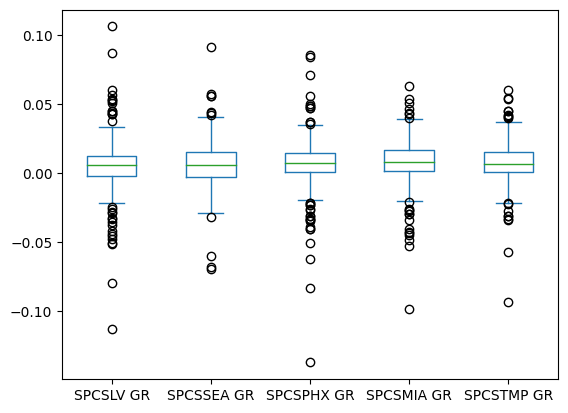

In [49]:
best_indexes.plot(kind='box')

The cities with the highest monthly returns in their price indices from 2012 to 2023 are Las Vegas, Seattle, Phoenix, Miami, and Tampa. Notably, Las Vegas and Phoenix exhibit greater volatility, with monthly returns ranging from -10% to 10%. In contrast, Miami and Tampa demonstrate lower volatility, with relative variations consistently within the range of -5% to 5% around the monthly average.

### 2.3. Select the most promising real estate markets to work with

<ipython-input-50-4ffa41c21914>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = consolidated_data.corr()


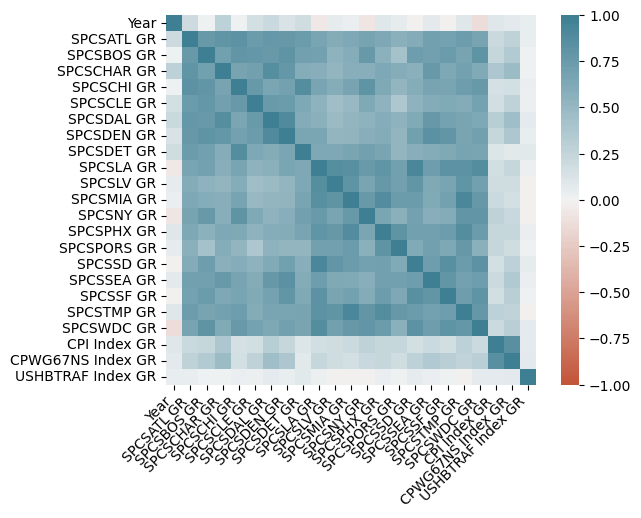

In [50]:
import seaborn as sn
import matplotlib.pyplot as plt


corr = consolidated_data.corr()
ax = sn.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


## Most promising markets for investment are the following ones according to the criteria:
- Return
- Standard deviation
- Correlation above 0.7 in Top five cities with best return performance :
Las Vegas(Los Angeles,Miami,SD,Tampa,Phoenix)
Miami (Los Angeles,Las Vegas,New York,Phoenix,Tamp)
Seatle (Denver,Dallas,Los Angeles, Sandiego, San Francisco)
Phoenix (Los Angeles, Las Vegas,Miami,Portland,Tampa)
Tampa(Los Angeles, Las vegas, Miami, Phoenix,Nueva York)

### 2.4. Select the relevant economic variables to explain the SyP Case Shiller Index behavior for the chosen city/es and explain why you chose them.

Based on economic data provided with monthly periodicity, the variables of change in prices for urban consumers CPI, Consumer prices for wage earners and U.S. Homebuilder potential buyers index exhibit low correlation and even a negative and low correlation in cities such as Miami, and Las Vegas

- In this case, it is better work only with SyP Case Shiler indexes to predict a performance model.

## 3. Utilization of data for business profitability
## 3.1. Create a predictive model to forecast the SyP Case Shiller Index

In [ ]:
#Define K-Means model
from sklearn.cluster import KMeans
from math import sqrt
import  pylab as pl

fdata = consolidated_data[['Date','SPCSLV GR','SPCSSEA GR','SPCSPHX GR','SPCSMIA GR','SPCSTMP GR','SPCSLA GR','SPCSSD GR','SPCSNY GR', 'SPCSDEN GR','SPCSDAL GR','SPCSPORS GR']].copy()
fdata.set_index("Date")


In [ ]:
fdata.dtypes

In [53]:
start = "2020-01-31"
data = data.loc[start:]
#Calculating annual mean returns and variances
returns = fdata.mean() * 12
variance = fdata.std() * sqrt(12)
returns.columns = ["Returns"]
variance.columns = ["Variance"]
#Concatenating the returns and variances into a single data-frame
ret_var = pd.concat([returns, variance], axis = 1).dropna()
ret_var.columns = ["Returns","Variance"]

<ipython-input-53-73762ed676ce>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  returns = fdata.mean() * 12
<ipython-input-53-73762ed676ce>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = fdata.std() * sqrt(12)


### 3.2. & 3.3. Test the model outputs, assumptions and make the necessary adjustments to make it more accurate.

In [ ]:
X =  ret_var.values #Converting ret_var into nummpy array
sse = []
for k in range(2,12):

    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)

    sse.append(kmeans.inertia_) #SSE for each n_clusters
pl.plot(range(2,12), sse)
pl.title("Elbow Curve")
pl.show()

The Elbow Method help us to find the optimal number of clusters (k) in a dataset. The SSE value slow downs after 6 clusters, choosing a cluster=6

### 3.4. Set your strategy to invest in the US Real Estate Market according to your model's advice

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


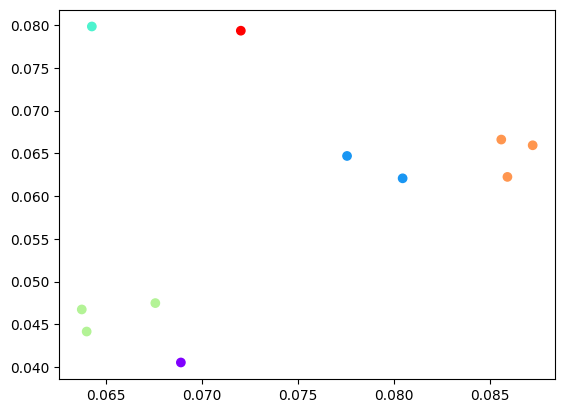

In [55]:
kmeans = KMeans(n_clusters = 6).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
pl.show()

### 3.5. Results

In [56]:
## Test what were your business proposal results, and if you were right or wrong, and why, plot whatever you need to support your arguments
#...
#...
#...the cluster number of each company in our data set so that we can differentiate between companies while constructing a diversified portfolio. In

House_P_Index = pd.DataFrame(ret_var.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df = pd.concat([House_P_Index, cluster_labels],axis = 1)
df

0  0
0     SPCSLV GR  2
1    SPCSSEA GR  1
2    SPCSPHX GR  5
3    SPCSMIA GR  4
4    SPCSTMP GR  1
5     SPCSLA GR  4
6     SPCSSD GR  4
7     SPCSNY GR  3
8    SPCSDEN GR  3
9    SPCSDAL GR  3
10  SPCSPORS GR  0

The results from the K-means model reveal distinctive clusters among cities. In the first cluster, Seattle and Tampa stand out, exhibiting both high returns and variance. The second cluster, comprising New York, Denver, and Dallas, is characterized by lower expected returns and higher variance compared to the overall mean. In the third cluster, Las Vegas emerges as a city with the lowest variance within the sample. The fourth cluster is represented by cities like Los Angeles, Miami, and Tampa, showing both high expected returns and variance compared to the rest of the cities. The last two clusters, featuring Phoenix and Portland, highlight cities with higher expected variance relative to their expected returns across all subsets of cities.

### You can complement your analysis with any other data science topic that you think is relevant to the problem. (Bonus points)
### Feel free to use any tool and change the structure of the notebook as you see fit.

# 4. Analysis, recommendations, and contestant's rigor in generating business value
### 4.1. Conclusions and recommendations to the company

## Based on following information from task, i would consider to check other macroeconomic variables, related with population and disposable income by selected cities. These information require a monthly periodicity so it can be useful for comparision and check if fits for modelling


##Considering the outcomes of the information analysis, it is advisable to conduct a Value at Risk (VaR) assessment under two scenarios:

## 1- Focus on the 11 selected housing price indices that have demonstrated high correlation in their performance, aiming for diversification in investment.

## 2- Concentrate on the top-performing 5 cities during the period 2012-2023, and simulate a portfolio of 5 stocks with a particular emphasis on those cities with exceptional performance, such as Miami and Las Vegas."

### 4.2. Business proposal to the company

In [60]:
#Based on original analysis, this would be the initial inputs to build up a VaR model on Case Shiller Index



# Set the investment weights  based on K-meamsn classification  cities SEATLE, TAMPA, NEW YORK, DENVER , DALLAS, LAS VEGAS, LOS ANGELES, MIAMI, TAMPA, PORTLAND, PHOENIX
weights = np.array([0.115,0.115,0.05,0.05,0.05,0.07,0.15,0.15,0.15,0.05,0.05])
tickers = ['SPCSLV GR','SPCSSEA GR', 'SPCSPHX GR', 'SPCSMIA GR','SPCSTMP GR','SPCSLA GR','SPCSSD GR','SPCSNY GR','SPCSDEN GR','SPCSDAL GR','SPCSDAL GR']

# Weights based on Best historical performance cities SEATLE, TAMPA, LAS VEGAS, MIAMI, PHOENIX
Best_cities_weights = np.array([0.15, 0.15, 0.25,	0.35, 0.1	])
Best_tickers = ['SPCSSEA GR','SPCSTMP GR','SPCSLV GR','SPCSMIA GR','SPCSPHX GR']
# Set an initial investment level
initial_investment = 10000000


In [63]:
# Generate Var-Cov matrix
cov_matrix = fdata.cov()
cov_matrix

<ipython-input-63-c29cbc25157f>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = fdata.cov()


SPCSLV GR  SPCSSEA GR  SPCSPHX GR  SPCSMIA GR  SPCSTMP GR  \
SPCSLV GR     0.000531    0.000268    0.000408    0.000357    0.000331   
SPCSSEA GR    0.000268    0.000349    0.000299    0.000219    0.000231   
SPCSPHX GR    0.000408    0.000299    0.000524    0.000383    0.000358   
SPCSMIA GR    0.000357    0.000219    0.000383    0.000362    0.000314   
SPCSTMP GR    0.000331    0.000231    0.000358    0.000314    0.000321   
SPCSLA GR     0.000357    0.000243    0.000330    0.000288    0.000266   
SPCSSD GR     0.000350    0.000260    0.000312    0.000272    0.000253   
SPCSNY GR     0.000195    0.000138    0.000190    0.000186    0.000181   
SPCSDEN GR    0.000164    0.000214    0.000191    0.000139    0.000163   
SPCSDAL GR    0.000148    0.000194    0.000182    0.000134    0.000159   
SPCSPORS GR   0.000190    0.000155    0.000216    0.000166    0.000161   

             SPCSLA GR  SPCSSD GR  SPCSNY GR  SPCSDEN GR  SPCSDAL GR  \
SPCSLV GR     0.000357   0.000350   0.000195    0.000164    0.000148   
SPCSSEA GR    0.000243   0.000260   0.000138    0.000214    0.000194   
SPCSPHX GR    0.000330   0.000312   0.000190    0.000191    0.000182   
SPCSMIA GR    0.000288   0.000272   0.000186    0.000139    0.000134   
SPCSTMP GR    0.000266   0.000253   0.000181    0.000163    0.000159   
SPCSLA GR     0.000323   0.000319   0.000172    0.000160    0.000139   
SPCSSD GR     0.000319   0.000370   0.000170    0.000189    0.000160   
SPCSNY GR     0.000172   0.000170   0.000163    0.000102    0.000093   
SPCSDEN GR    0.000160   0.000189   0.000102    0.000188    0.000165   
SPCSDAL GR    0.000139   0.000160   0.000093    0.000165    0.000182   
SPCSPORS GR   0.000148   0.000139   0.000086    0.000084    0.000086   

             SPCSPORS GR  
SPCSLV GR       0.000190  
SPCSSEA GR      0.000155  
SPCSPHX GR      0.000216  
SPCSMIA GR      0.000166  
SPCSTMP GR      0.000161  
SPCSLA GR       0.000148  
SPCSSD GR       0.000139  
SPCSNY GR       0.000086  
SPCSDEN GR      0.000084  
SPCSDAL GR      0.000086  
SPCSPORS GR     0.000137

VaR with initial Variables (11 Cities)

In [ ]:
avg_rets = fdata.mean()

# Calculate mean returns for portfolio overall,
# using dot product to
# normalize individual means against investment weights
 # https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
port_mean = avg_rets.dot(weights)

# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment

# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

In [81]:
# Select our confidence interval (95%)
conf_level1 = 0.05


from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)
#Calculation of the VaR at our confidence interval (95%)
var_1d1 = initial_investment - cutoff1
var_1d1

181181.74479939602

In [86]:
# Calculate n Day VaR
var_array = []
num_months = int(24)
for x in range(1, num_months+1):
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))


1 day VaR @ 95% confidence: 181181.74
2 day VaR @ 95% confidence: 256229.68
3 day VaR @ 95% confidence: 313815.99
4 day VaR @ 95% confidence: 362363.49
5 day VaR @ 95% confidence: 405134.7
6 day VaR @ 95% confidence: 443802.83
7 day VaR @ 95% confidence: 479361.84
8 day VaR @ 95% confidence: 512459.36
9 day VaR @ 95% confidence: 543545.23
10 day VaR @ 95% confidence: 572946.98
11 day VaR @ 95% confidence: 600911.87
12 day VaR @ 95% confidence: 627631.97
13 day VaR @ 95% confidence: 653260.07
14 day VaR @ 95% confidence: 677920.01
15 day VaR @ 95% confidence: 701713.88
16 day VaR @ 95% confidence: 724726.98
17 day VaR @ 95% confidence: 747031.47
18 day VaR @ 95% confidence: 768689.04
19 day VaR @ 95% confidence: 789752.92
20 day VaR @ 95% confidence: 810269.4
21 day VaR @ 95% confidence: 830279.06
22 day VaR @ 95% confidence: 849817.71
23 day VaR @ 95% confidence: 868917.12
24 day VaR @ 95% confidence: 887605.65


VaR with Best cities (5 Cities)

In [87]:
bfdata =fdata[['SPCSSEA GR','SPCSTMP GR','SPCSLV GR','SPCSMIA GR','SPCSPHX GR']].copy()
bfdata

SPCSSEA GR  SPCSTMP GR  SPCSLV GR  SPCSMIA GR  SPCSPHX GR
1      0.004800    0.005100   0.003300    0.002100    0.004300
2      0.017516    0.002388   0.005681    0.005289    0.009858
3      0.024844    0.024913   0.010208    0.020548    0.015382
4      0.004772    0.010556   0.005003    0.006614    0.008837
5      0.005129    0.010541   0.006833    0.001739    0.004428
..          ...         ...        ...         ...         ...
202    0.008412    0.004909   0.009386    0.013587    0.011336
203    0.004724    0.007221   0.011260    0.007415    0.008627
204    0.001747    0.003795   0.011135    0.012204    0.006680
205   -0.010568    0.005199   0.008916    0.011630    0.010884
206   -0.013636    0.001045   0.002183    0.002599   -0.003313

[206 rows x 5 columns]

In [88]:
# Generate Var-Cov matrix
b_cov_matrix = bfdata.cov()
b_cov_matrix

SPCSSEA GR  SPCSTMP GR  SPCSLV GR  SPCSMIA GR  SPCSPHX GR
SPCSSEA GR    0.000349    0.000231   0.000268    0.000219    0.000299
SPCSTMP GR    0.000231    0.000321   0.000331    0.000314    0.000358
SPCSLV GR     0.000268    0.000331   0.000531    0.000357    0.000408
SPCSMIA GR    0.000219    0.000314   0.000357    0.000362    0.000383
SPCSPHX GR    0.000299    0.000358   0.000408    0.000383    0.000524

In [89]:
b_avg_rets = bfdata.mean()

# Calculate mean returns for portfolio overall,
# using dot product to
# normalize individual means against investment weights
 # https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
b_port_mean = b_avg_rets.dot(Best_cities_weights)

# Calculate portfolio standard deviation
b_port_stdev = np.sqrt(Best_cities_weights.T.dot(b_cov_matrix).dot(Best_cities_weights))

# Calculate mean of investment
b_mean_investment = (1+b_port_mean) * initial_investment

# Calculate standard deviation of investmnet
b_stdev_investment = initial_investment * b_port_stdev

In [90]:
_# Select our confidence interval (95%)
conf_level1 = 0.05
cutoff2 = norm.ppf(conf_level1, b_mean_investment, b_stdev_investment)
#Calculation of the VaR at our confidence interval (95%)
var_2d1 = initial_investment - cutoff2
var_2d1

238042.0320346132

In [91]:
# Calculate n Day VaR
var_array2 = []
num_months = int(24)
for x in range(1, num_months+1):
    var_array2.append(np.round(var_2d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_2d1 * np.sqrt(x),2)))

1 day VaR @ 95% confidence: 238042.03
2 day VaR @ 95% confidence: 336642.27
3 day VaR @ 95% confidence: 412300.89
4 day VaR @ 95% confidence: 476084.06
5 day VaR @ 95% confidence: 532278.17
6 day VaR @ 95% confidence: 583081.52
7 day VaR @ 95% confidence: 629800.02
8 day VaR @ 95% confidence: 673284.54
9 day VaR @ 95% confidence: 714126.1
10 day VaR @ 95% confidence: 752755.0
11 day VaR @ 95% confidence: 789496.1
12 day VaR @ 95% confidence: 824601.79
13 day VaR @ 95% confidence: 858272.75
14 day VaR @ 95% confidence: 890671.73
15 day VaR @ 95% confidence: 921932.83
16 day VaR @ 95% confidence: 952168.13
17 day VaR @ 95% confidence: 981472.44
18 day VaR @ 95% confidence: 1009926.81
19 day VaR @ 95% confidence: 1037601.16
20 day VaR @ 95% confidence: 1064556.33
21 day VaR @ 95% confidence: 1090845.63
22 day VaR @ 95% confidence: 1116516.1
23 day VaR @ 95% confidence: 1141609.48
24 day VaR @ 95% confidence: 1166163.03


5. Communication and presentation skills in delivering results

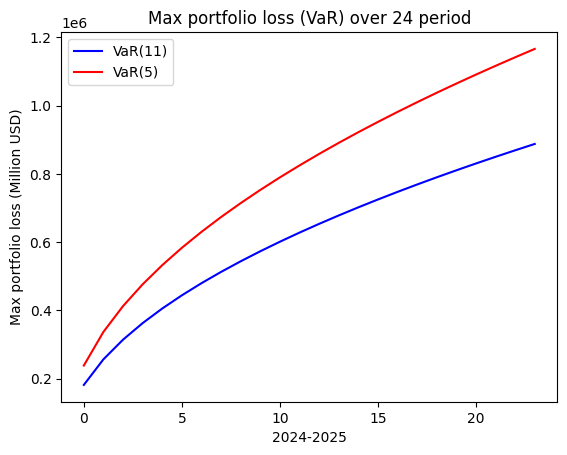

In [110]:
# Based on simulated case of two portfolio. The following results shows:


# Build plot VaR 11 cities
plt.xlabel("2024-2025")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 24 period")
plt.plot(var_array, color="b", label='VaR(11)')


# Build plot VaR 5 cities
plt.xlabel("2024-2025")
plt.ylabel("Max portfolio loss (Million USD)")
plt.title("Max portfolio loss (VaR) over 24 period")
plt.plot(var_array2, color="r",label='VaR(5)')


# Combine all the operations and display
plt.legend()
plt.show()

Comparing simulations of Value at Risk (VaR) between the initial scenario encompassing 11 cities and the best 5 cities reveals a distinct divergence in volatility, amounting to approximately 4 percentage points by November 2025. This discrepancy could translate to a variance in volatility of around 400k at the end of 24 periods.

Checking distributions of indexes equities against normal distribution

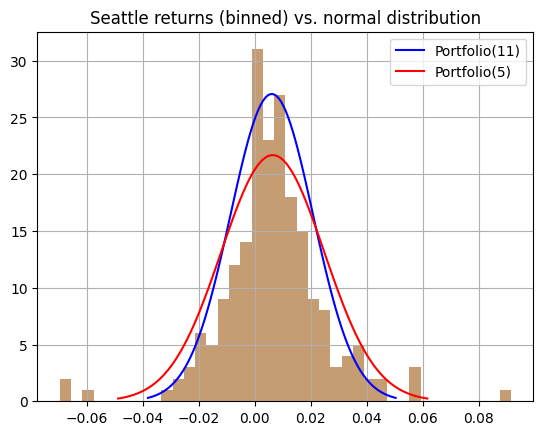

In [127]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
# Seattle Case
fdata['SPCSSEA GR'].hist(bins=40,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "b",label='Portfolio(11)')
plt.title("Seattle returns (binned) vs. normal distribution")

# Histogram comparing Portfolio only 5 cities
fdata['SPCSSEA GR'].hist(bins=40,histtype="stepfilled",alpha=0.5)
x = np.linspace(b_port_mean - 3*b_port_stdev, b_port_mean+3*b_port_stdev,100)
plt.plot(x, norm.pdf(x, b_port_mean, b_port_stdev), "r",label='Portfolio(5)')
plt.title("Seattle returns (binned) vs. normal distribution")

plt.legend()
plt.show()



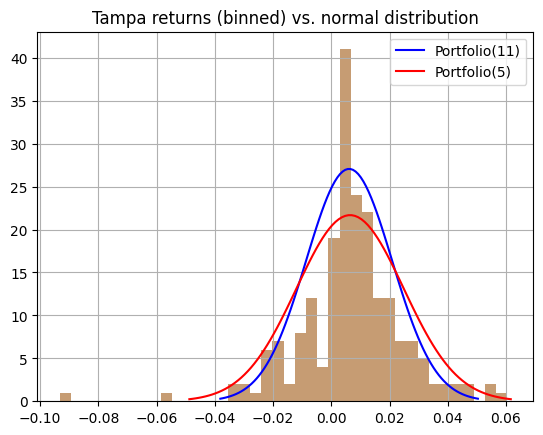

In [128]:
#Tampa Case
fdata['SPCSTMP GR'].hist(bins=40,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "b",label='Portfolio(11)')
plt.title("Tampa returns (binned) vs. normal distribution")


# Histogram comparing Portfolio only 5 cities
fdata['SPCSTMP GR'].hist(bins=40,histtype="stepfilled",alpha=0.5)
x = np.linspace(b_port_mean - 3*b_port_stdev, b_port_mean+3*b_port_stdev,100)
plt.plot(x, norm.pdf(x, b_port_mean, b_port_stdev), "r",label='Portfolio(5)')
plt.title("Tampa returns (binned) vs. normal distribution")

# Combine all the operations and display
plt.legend()
plt.show()


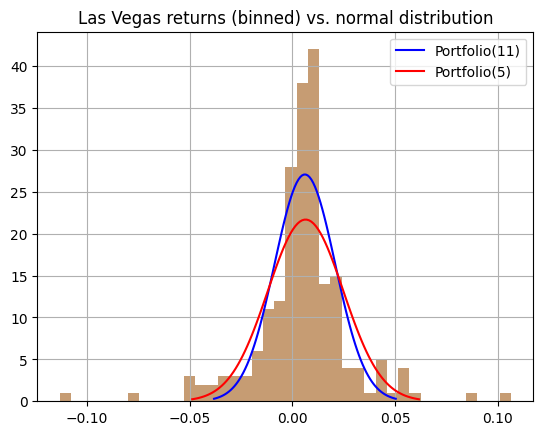

In [129]:
# Las Vegas Case
fdata['SPCSLV GR'].hist(bins=40,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "b",label='Portfolio(11)')
plt.title("Las Vegas returns (binned) vs. normal distribution")

# Histogram comparing Portfolio only 5 cities
fdata['SPCSLV GR'].hist(bins=40,histtype="stepfilled",alpha=0.5)
x = np.linspace(b_port_mean - 3*b_port_stdev, b_port_mean+3*b_port_stdev,100)
plt.plot(x, norm.pdf(x, b_port_mean, b_port_stdev), "r",label='Portfolio(5)')
plt.title("Las Vegas returns (binned) vs. normal distribution")

plt.legend()
plt.show()




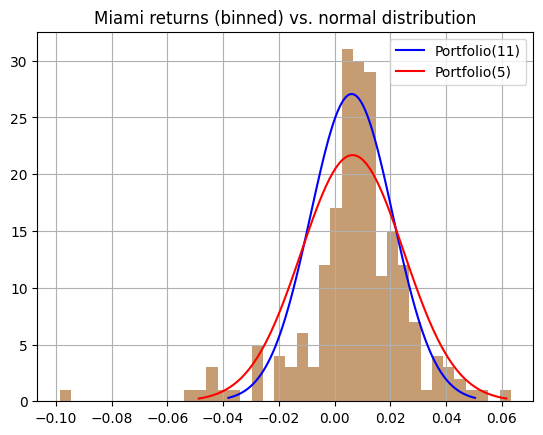

In [130]:
# Miami Case
fdata['SPCSMIA GR'].hist(bins=40,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "b",label='Portfolio(11)')
plt.title("Miami returns (binned) vs. normal distribution")

# Histogram comparing Portfolio only 5 cities
fdata['SPCSMIA GR'].hist(bins=40,histtype="stepfilled",alpha=0.5)
x = np.linspace(b_port_mean - 3*b_port_stdev, b_port_mean+3*b_port_stdev,100)
plt.plot(x, norm.pdf(x, b_port_mean, b_port_stdev), "r",label='Portfolio(5)')
plt.title("Miami returns (binned) vs. normal distribution")

plt.legend()
plt.show()

#,'SPCSMIA GR','SPCSPHX GR']

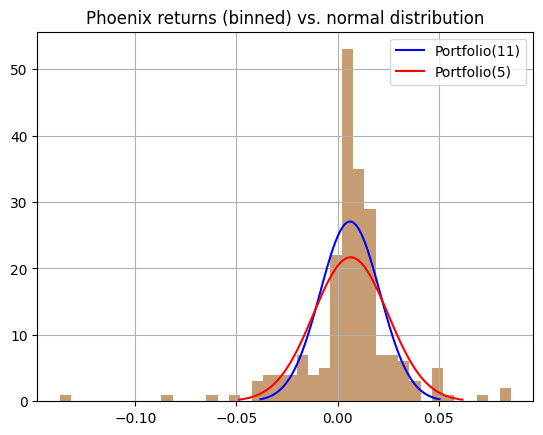

In [131]:
# Phoenix Case
fdata['SPCSPHX GR'].hist(bins=40,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "b",label='Portfolio(11)')
plt.title("Miami returns (binned) vs. normal distribution")

# Histogram comparing Portfolio only 5 cities
fdata['SPCSPHX GR'].hist(bins=40,histtype="stepfilled",alpha=0.5)
x = np.linspace(b_port_mean - 3*b_port_stdev, b_port_mean+3*b_port_stdev,100)
plt.plot(x, norm.pdf(x, b_port_mean, b_port_stdev), "r",label='Portfolio(5)')
plt.title("Phoenix returns (binned) vs. normal distribution")

plt.legend()
plt.show()



We assume that the returns of the equities in both portfolios follow a normal distribution when calculating Value at Risk (VaR). While we cannot predict future outcomes with certainty, analyzing the historical distribution of returns can help us assess the suitability of VaR for our portfolio. The portfolio aligns more closely with historical distributions from Seattle and Miami when considering all cities compared to just five cities. In the other three cases, there is evidence of leptokurtic distributions in their positive returns.